<a href="https://colab.research.google.com/github/ritesh200tiwari/letsgrowmore-virutal-internship/blob/main/lstm_internship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2:- STOCK MARKET PREDICTION AND FORECASTING USING LTSM

In [ ]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
url='https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset=pd.read_csv(url,index_col=0)

In [ ]:
dataset

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...
2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [ ]:
dataset.shape

(2035, 7)

In [ ]:
dataset.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset.tail()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56



Plotting the graph of open price

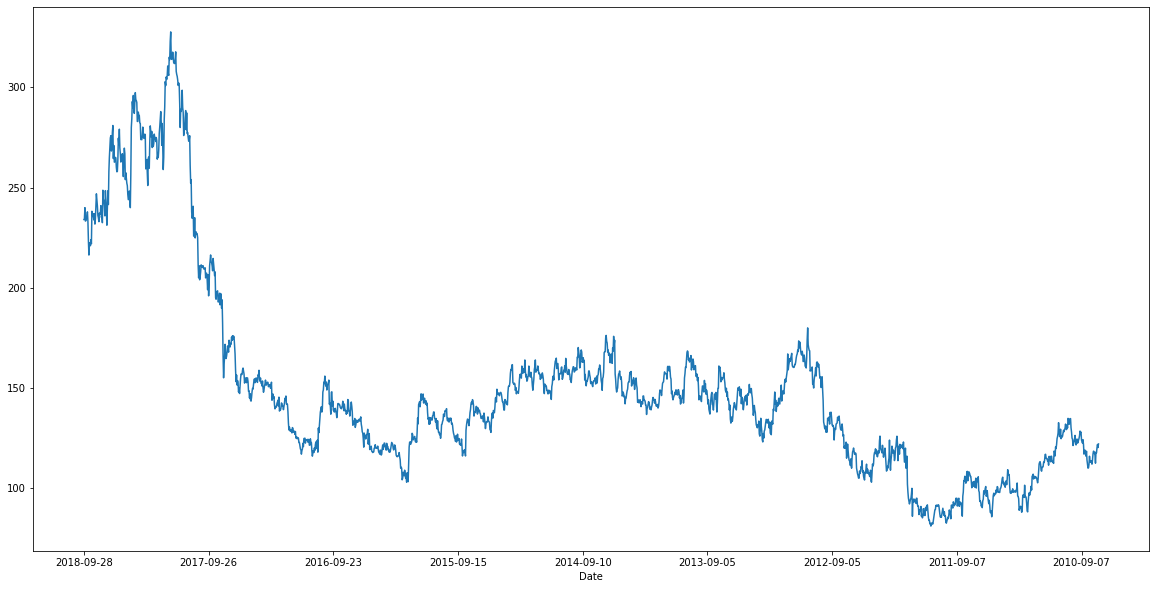

In [ ]:
dataset['Open'].plot(figsize=(20,10))

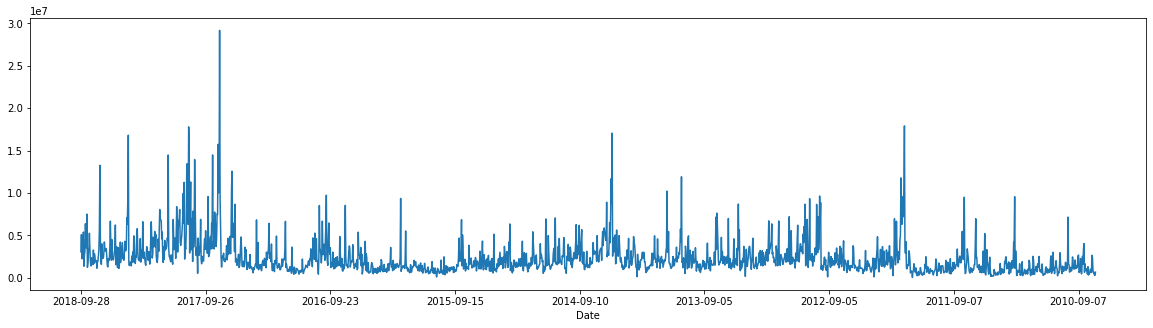

In [ ]:
dataset['Total Trade Quantity'].plot(figsize=(20,5))


Seperating the data for training and testing purpose

In [ ]:
dataset_training=dataset.iloc[:int(len(dataset)*0.75), ]
dataset_testing=dataset.iloc[int(len(dataset)*0.75):, ]

In [ ]:
print('Training dataset shape',dataset_training.shape)
print('Testing dataset shape',dataset_testing.shape)

Training dataset shape (1526, 7)
Testing dataset shape (509, 7)


In [ ]:
dataset_training.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
dataset_training.shape

(1526, 7)

In [ ]:
dataset_testing.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2012-07-27,120.0,123.95,119.8,120.65,120.65,2010264,2453.32
2012-07-26,120.0,123.25,119.3,120.00,120.05,2495002,3012.91
2012-07-25,123.0,125.00,119.0,120.65,120.80,2974617,3618.35
2012-07-24,115.0,124.15,115.0,123.00,123.40,4358964,5276.56
2012-07-23,118.0,119.40,115.0,116.00,115.65,871954,1022.95


In [ ]:
dataset_testing.shape

(509, 7)

In [ ]:
training_set=dataset_training.iloc[:, 0:1].values
training_set

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [126.7 ],
       [120.  ],
       [121.  ]])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
training_set_scaled=scaler.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.58322207],
       [0.58544726],
       [0.60970182],
       ...,
       [0.10547397],
       [0.07565643],
       [0.08010681]])

In [ ]:
x_train=[]
y_train=[]
for i in range(60,len(dataset_training)):
    x_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i, 0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
regressor=Sequential([
    LSTM(60,return_sequences=True,input_shape=(x_train.shape[1],1)),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=True),
    Dropout(0.3),
    LSTM(60,return_sequences=False),
    Dropout(0.3),
    Dense(1)
])
regressor.compile(optimizer='adam',loss='mean_squared_error')
regressor.fit(x_train,y_train,epochs=100,batch_size=64)

Epoch 1/100
23/23 [==============================] - 14s 222ms/step - loss: 0.0283
Epoch 2/100
23/23 [==============================] - 5s 223ms/step - loss: 0.0061
Epoch 3/100
23/23 [==============================] - 5s 219ms/step - loss: 0.0040
Epoch 4/100
23/23 [==============================] - 5s 225ms/step - loss: 0.0048
Epoch 5/100
23/23 [==============================] - 5s 228ms/step - loss: 0.0041
Epoch 6/100
23/23 [==============================] - 5s 237ms/step - loss: 0.0039
Epoch 7/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0041
Epoch 8/100
23/23 [==============================] - 5s 236ms/step - loss: 0.0043
Epoch 9/100
23/23 [==============================] - 5s 221ms/step - loss: 0.0040
Epoch 10/100
23/23 [==============================] - 5s 224ms/step - loss: 0.0039
Epoch 11/100
23/23 [==============================] - 5s 238ms/step - loss: 0.0036
Epoch 12/100
23/23 [==============================] - 6s 240ms/step - loss: 0.0035
Epoch 13/100

In [ ]:
dataset_total =pd.concat((dataset_training['Open'],dataset_testing['Open']),axis=0)

In [ ]:
inputs=dataset_total[len(dataset_total)-len(dataset_testing)-60:].values
inputs=inputs.reshape(-1,1)
inputs=scaler.transform(inputs)

In [ ]:
x_test=[]
for i in range(60,569):
    x_test.append(inputs[i-60:i, 0])
x_test=np.array(x_test)

In [ ]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [ ]:
predicted_stock_price=regressor.predict(x_test)

In [ ]:
predicted_stock_price=scaler.inverse_transform(predicted_stock_price)

In [ ]:
dataset_testing['Predicted']=predicted_stock_price

In [ ]:
final_visualization=pd.concat([dataset['Open'],dataset_testing['Open'],dataset_testing['Predicted']],axis=1)

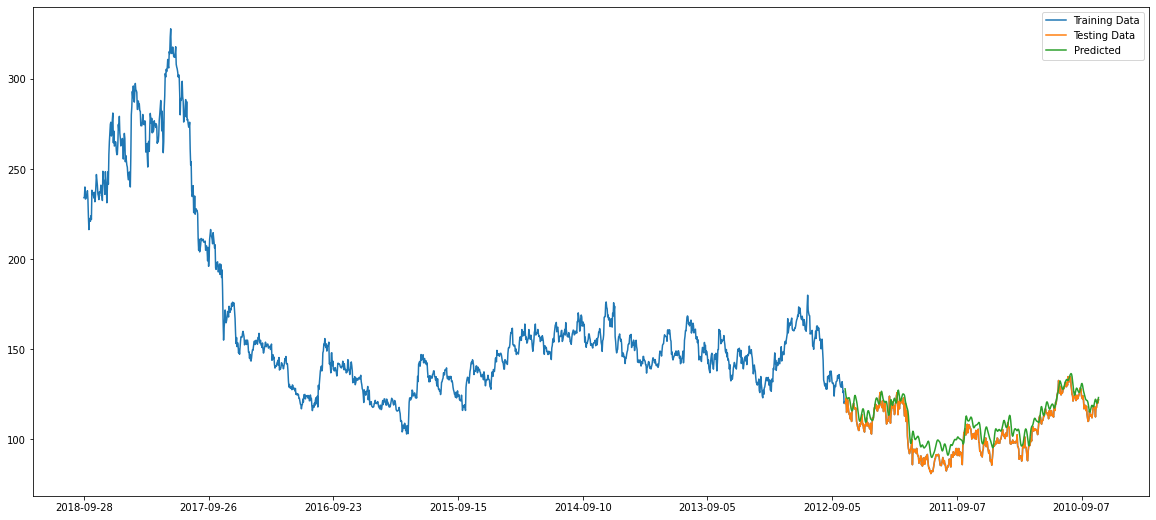

In [ ]:
final_visualization.plot(figsize=(20,9))
final_visualization.columns=['Training Data','Testing Data','Predicted']

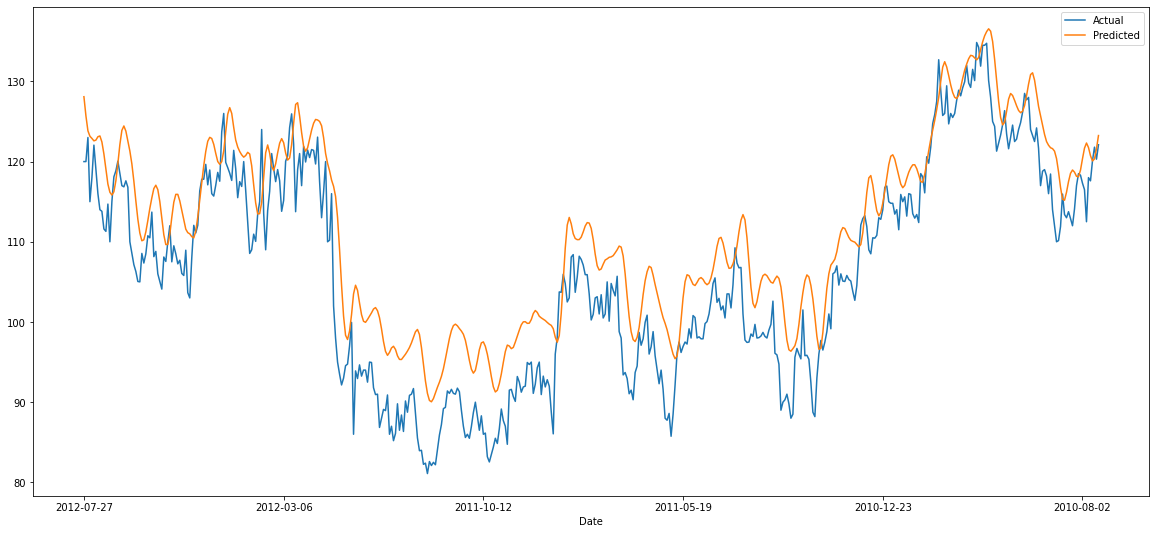

In [ ]:
plt.figure(figsize=(20,9))
dataset_testing['Open'].plot(label='Actual')
dataset_testing['Predicted'].plot(label='Predicted')
plt.legend()

In [ ]:
Actual=dataset_testing['Open']
Predicted=dataset_testing['Predicted']

In [ ]:
Dataframe=pd.DataFrame({'Actual':Actual,'Predicted':Predicted})

In [ ]:
Dataframe

,Actual,Predicted
Date,,
2012-07-27,120.0,128.088791
2012-07-26,120.0,125.703964
2012-07-25,123.0,123.835564
2012-07-24,115.0,123.160210
2012-07-23,118.0,122.890503
...,...,...
2010-07-27,117.6,120.737801
2010-07-26,120.1,120.075752
2010-07-23,121.8,120.331390
